In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 

In [2]:
warnings.filterwarnings("ignore")

In [3]:
dataset=pd.read_csv("Admission_Predict.csv")

In [4]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
x = dataset.iloc[:, :-1] . values
y = dataset.iloc[:, -1] . values

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

In [9]:
x[:, 0]=labelencoder_x.fit_transform(x[:, 0])
x[:, 1]=labelencoder_x.fit_transform(x[:, 1])
x[:, 2]=labelencoder_x.fit_transform(x[:, 2])
x[:, 3]=labelencoder_x.fit_transform(x[:, 3])
x[:, 4]=labelencoder_x.fit_transform(x[:, 4])
x[:, 5]=labelencoder_x.fit_transform(x[:, 5])
x[:, 6]=labelencoder_x.fit_transform(x[:, 6])
x[:, 7]=labelencoder_x.fit_transform(x[:, 7])

In [10]:
x

array([[  0.,  45.,  26., ...,   7., 156.,   1.],
       [  1.,  32.,  15., ...,   7., 101.,   1.],
       [  2.,  24.,  12., ...,   5.,  32.,   1.],
       ...,
       [397.,  38.,  24., ...,   7., 145.,   1.],
       [398.,  20.,  11., ...,   6.,  95.,   0.],
       [399.,  41.,  25., ...,   6., 157.,   1.]])

In [11]:
labelencoder_y=LabelEncoder()

In [12]:
y=labelencoder_y.fit_transform(y)

In [13]:
y

array([54, 38, 34, 42, 27, 52, 37, 30, 12,  7, 14, 46, 40, 24, 23, 16, 28,
       27, 25, 24, 26, 32, 56, 57, 59, 56, 38,  6,  8, 16, 27, 36, 53, 52,
       56, 50, 26, 20, 14, 10,  8, 11, 15, 49, 53, 50, 48, 51, 44, 40, 38,
       18, 40, 34, 32, 26, 26,  8,  1,  4, 10,  9, 16, 18, 14, 17, 23, 19,
       30, 40, 56, 58, 55, 46, 36, 34, 36, 26,  6,  8, 12, 58, 54, 54, 56,
       38, 34, 28, 26, 36, 26,  2,  0,  6,  1,  4, 10, 48, 52, 41, 33, 26,
       24, 19, 36, 31, 49, 53, 55, 30, 23, 31, 24, 34, 21, 28, 18,  7,  9,
       33, 56, 56, 19, 23, 19, 26, 47, 40, 46, 54, 58, 39, 33, 41, 51, 44,
       38, 33, 42, 40, 46, 52, 54, 59, 42, 43, 37, 45, 58, 41, 55, 56, 48,
       41, 42, 39, 32, 27, 23, 14, 19, 15, 29, 30, 43, 40, 27, 26, 26, 27,
       30, 51, 48, 51, 49, 47, 52, 44, 34, 35, 33, 33, 30, 37, 34, 51, 46,
       55, 55, 50, 52, 49, 48, 56, 39, 40, 35, 35, 32, 34, 35, 34, 59, 59,
       31, 19, 25, 28, 26, 30, 41, 44, 57, 58, 56, 55, 53, 47, 46, 36, 38,
       37, 38, 33, 29, 23

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
x_train.shape, x_test.shape

((320, 8), (80, 8))

In [16]:
y_train.shape, y_test.shape

((320,), (80,))

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
model = scaler.fit(dataset)
scaled_data = model.transform(dataset)

In [19]:
print(scaled_data)

[[-1.72772608  1.76210664  1.74697064 ...  1.76481828  0.90911166
   1.37364801]
 [-1.7190658   0.62765641 -0.06763531 ...  0.45515126  0.90911166
   0.25029671]
 [-1.71040552 -0.07046681 -0.56252785 ... -1.00563118  0.90911166
  -0.03054111]
 ...
 [ 1.71040552  1.15124883  1.41704229 ...  1.42900622  0.90911166
   1.30343855]
 [ 1.7190658  -0.41952842 -0.72749202 ...  0.30403584 -1.09997489
  -0.38158839]
 [ 1.72772608  1.41304503  1.58200646 ...  1.78160888  0.90911166
   1.58427637]]


In [20]:
print(x[:5])

[[  0.  45.  26.   3.   7.   7. 156.   1.]
 [  1.  32.  15.   3.   6.   7. 101.   1.]
 [  2.  24.  12.   2.   4.   5.  32.   1.]
 [  3.  30.  18.   2.   5.   3.  84.   1.]
 [  4.  22.  11.   1.   2.   4.  49.   0.]]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [27]:
test_pred = model.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
mae = mean_absolute_error(y_test,test_pred)
mse = mean_squared_error(y_test,test_pred)
rmse = np.sqrt(mse)
r2_score = model.score(x_train,y_train)

In [29]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2_score}')
print("The accuracy of our model is {}%".format(round(r2_score, 2) *100))

MAE: 4.825100612744206
MSE: 43.063977662079516
RMSE: 6.562314962121181
R-squared: -5646.662940120554
The accuracy of our model is -564666.0%


In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [31]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=0)
model.fit(x_train, y_train)

Ridge(alpha=100, random_state=0, solver='cholesky')

In [32]:
mae = mean_absolute_error(y_test,test_pred)
mse = mean_squared_error(y_test,test_pred)
rmse = np.sqrt(mse)
r2_score = model.score(x_train,y_train)

In [34]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2_score}')
print("The accuracy of our model is {}%".format(round(r2_score, 2) *100))

MAE: 4.825100612744206
MSE: 43.063977662079516
RMSE: 6.562314962121181
R-squared: 0.8299841224890271
The accuracy of our model is 83.0%


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [37]:
y_pred_gini = clf_gini.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.0875


In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test[:14], y_pred_gini[:14].ravel())
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 72.0%


[Text(0.5, 0.875, 'x[6] <= 128.5\ngini = 0.977\nsamples = 320\nvalue = [2, 2, 2, 2, 2, 2, 5, 4, 2, 3, 2, 1, 4, 3\n4, 6, 6, 4, 3, 1, 3, 7, 5, 13, 8, 7, 6, 6\n6, 10, 12, 11, 9, 9, 7, 9, 7, 10, 9, 9, 7, 8\n2, 8, 5, 7, 3, 3, 5, 5, 6, 5, 8, 11, 3, 7\n4]'),
 Text(0.25, 0.625, 'x[6] <= 99.5\ngini = 0.973\nsamples = 266\nvalue = [2, 2, 2, 2, 2, 2, 5, 4, 2, 3, 2, 1, 4, 3\n4, 6, 6, 4, 3, 1, 3, 7, 5, 13, 8, 7, 6, 6\n6, 10, 12, 11, 9, 9, 7, 9, 7, 10, 9, 9, 7, 8\n2, 8, 4, 6, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.125, 0.375, 'x[6] <= 54.5\ngini = 0.968\nsamples = 210\nvalue = [2, 2, 2, 2, 2, 2, 5, 4, 2, 3, 2, 1, 4, 3\n4, 6, 6, 4, 3, 1, 2, 7, 5, 13, 8, 6, 6, 6\n6, 9, 12, 11, 9, 8, 7, 8, 6, 5, 5, 4, 4, 1\n0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.0625, 0.125, 'gini = 0.96\nsamples = 95\nvalue = [2, 2, 2, 2, 2, 1, 5, 4, 2, 3, 2, 1, 3, 2\n4, 4, 3, 4, 2, 1, 1, 5, 2, 9, 6, 2, 2, 3\n1, 1, 2, 5, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.1875, 0

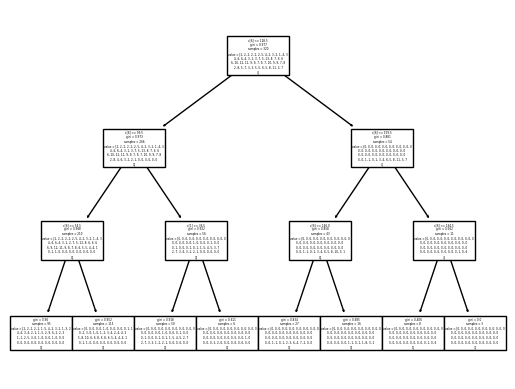

In [40]:
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [53]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [54]:
y_pred_en = clf_en.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.0500


[Text(0.5, 0.875, 'x[6] <= 99.5\nentropy = 5.622\nsamples = 320\nvalue = [2, 2, 2, 2, 2, 2, 5, 4, 2, 3, 2, 1, 4, 3\n4, 6, 6, 4, 3, 1, 3, 7, 5, 13, 8, 7, 6, 6\n6, 10, 12, 11, 9, 9, 7, 9, 7, 10, 9, 9, 7, 8\n2, 8, 5, 7, 3, 3, 5, 5, 6, 5, 8, 11, 3, 7\n4]'),
 Text(0.25, 0.625, 'x[6] <= 48.5\nentropy = 5.177\nsamples = 210\nvalue = [2, 2, 2, 2, 2, 2, 5, 4, 2, 3, 2, 1, 4, 3\n4, 6, 6, 4, 3, 1, 2, 7, 5, 13, 8, 6, 6, 6\n6, 9, 12, 11, 9, 8, 7, 8, 6, 5, 5, 4, 4, 1\n0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.125, 0.375, 'x[6] <= 30.5\nentropy = 4.819\nsamples = 84\nvalue = [2, 2, 2, 2, 2, 1, 5, 4, 2, 3, 2, 1, 3, 2\n4, 4, 3, 3, 2, 1, 0, 4, 2, 7, 5, 2, 1, 3\n1, 1, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.0625, 0.125, 'entropy = 4.358\nsamples = 45\nvalue = [1, 2, 2, 2, 2, 1, 4, 3, 1, 2, 0, 1, 2, 1\n3, 4, 3, 2, 1, 1, 0, 0, 0, 3, 0, 0, 0, 2\n1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.1

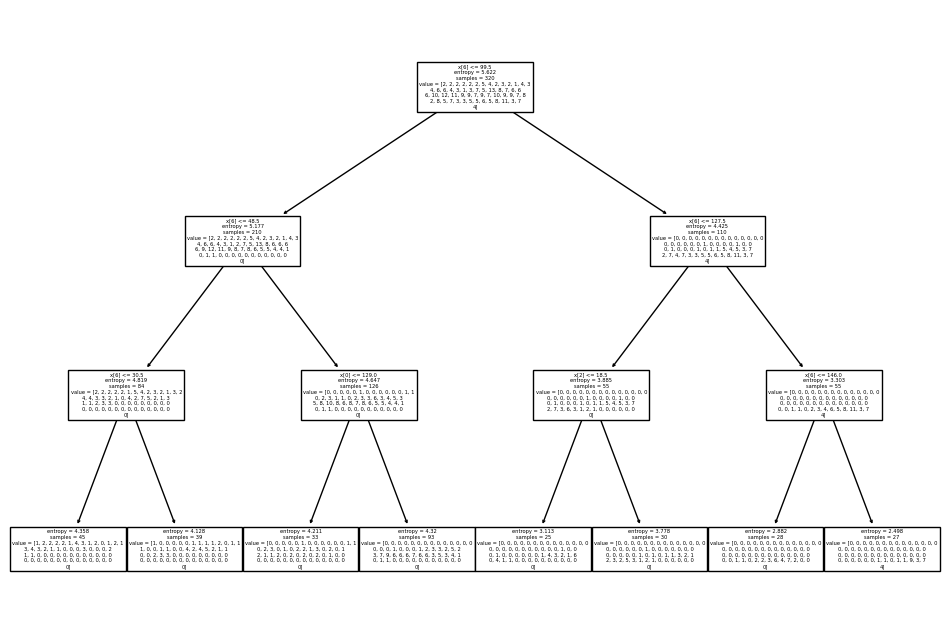

In [56]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train)) 

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7]
}

In [60]:
clf = DecisionTreeClassifier(random_state=0)

In [61]:
grid_search = GridSearchCV(clf, param_grid, cv=5)

In [62]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7]})

In [66]:
print("Best parameters found by grid search:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(x_test)
print('Model accuracy score with best parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred_best)))

Best parameters found by grid search: {'criterion': 'gini', 'max_depth': 3}
Model accuracy score with best parameters: 0.0875


In [74]:
mae = mean_absolute_error(y_test,y_pred_best)
mse = mean_squared_error(y_test,y_pred_best)
rmse = np.sqrt(mse)

In [75]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 6.3
MSE: 85.25
RMSE: 9.233092656309694


In [79]:
from sklearn.metrics import r2_score
score = r2_score(y_test[:15], y_pred_best[:15].ravel())
print("r2_score: ",score)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

r2_score:  0.7183270332886234
The accuracy of our model is 72.0%
